# Chapter 9 教師なし学習

* クラスタリング
* 主成分分析
* マーケットバスケット分析

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import sklearn
%precision 3

'%.3f'

## クラスタリング

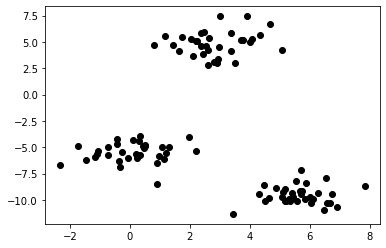

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# make_blobsは２つの値を返すので、片方のみ使う
X,_=make_blobs(random_state=10)
plt.scatter(X[:,0],X[:,1],color='black')

In [5]:
kmeans = KMeans(init='random',n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

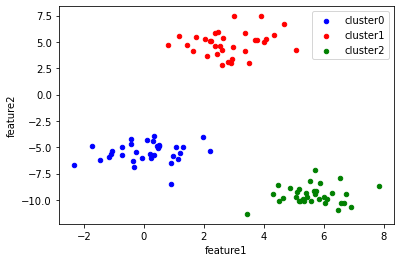

In [7]:
merge_data = pd.concat([pd.DataFrame(X[:,0]),pd.DataFrame(X[:,1]),pd.DataFrame(y_pred)],axis=1)
merge_data.columns = ['feature1','feature2','cluster']
ax = None
colors = ['blue','red','green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1',y='feature2',color=colors[i],label=f'cluster{i}',ax=ax)

In [10]:
for i , data in merge_data.groupby('cluster'):
    print(i,data)

0     feature1  feature2  cluster
0  -2.324963 -6.699996        0
1   0.518568 -4.900868        0
7  -0.420842 -4.248893        0
13  1.188289 -5.560588        0
14 -0.317489 -6.863378        0
21  1.955526 -4.056901        0
23  1.314690 -5.010552        0
30  0.917266 -6.526378        0
34 -0.435589 -4.722292        0
35  0.347893 -3.889659        0
36  0.977001 -5.798493        0
40 -1.740931 -4.891770        0
42 -1.109557 -5.627137        0
43  0.244313 -6.018977        0
48 -1.054613 -5.343668        0
51  2.195190 -5.386886        0
54 -0.077901 -5.984854        0
57  0.480855 -5.089769        0
62 -1.152964 -5.892795        0
63  0.103278 -4.301323        0
64  1.137309 -6.076044        0
67  0.504025 -4.760093        0
68 -0.362961 -6.295458        0
69  0.302490 -4.369094        0
74  0.214755 -5.681366        0
77  0.912641 -8.483664        0
84 -0.742659 -5.764927        0
86 -1.450740 -6.183014        0
88  1.070270 -4.939715        0
89  0.431029 -4.841693        0
93  0.

In [11]:
import requests,zipfile
import io
zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
r = requests.get(zip_file_url,stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [12]:
ls

README.md        bank-names.txt  chap3/       chap6.ipynb
Untitled.ipynb   bank.csv        chap3.ipynb  chap7.ipynb
Untitled1.ipynb  chap1.ipynb     chap4.ipynb  chap8.ipynb
bank-full.csv    chap2.ipynb     chap5.ipynb  first_test.ipynb


In [16]:
bank = pd.read_csv('chap9/bank-full.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
print('データ形式(X,y): {}'.format(bank.shape))
print('欠損データの数： {}'.format(bank.isnull().sum().sum()))

データ形式(X,y): (45211, 17)
欠損データの数： 0


In [18]:
from sklearn.preprocessing import StandardScaler
bank_sub = bank[['age','balance','campaign','previous']]
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


0    14406
1    23608
2     3842
3     1373
4     1282
5      700
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

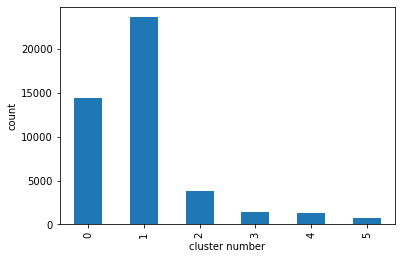

In [24]:
# クラスタリング処理
kmeans = KMeans(init='random',n_clusters = 6,random_state=0)
kmeans.fit(bank_sub_std)
labels = pd.Series(kmeans.labels_,name='cluster_number')
print(labels.value_counts(sort=False))
# value_countsはユニークな要素の値がindex、その出現個数がdataとなる
ax = labels.value_counts(sort=False)
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

Text(0, 0.5, 'Distortion')

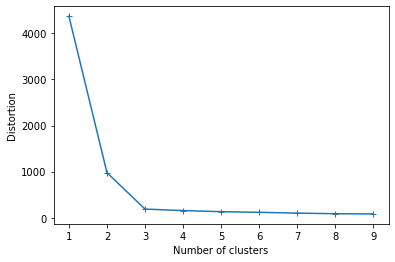

In [26]:
# エルボー法によるクラスター数の推定
dist_list = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i,init='random',random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)
plt.plot(range(1,10),dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

Text(0, 0.5, 'Distortion')

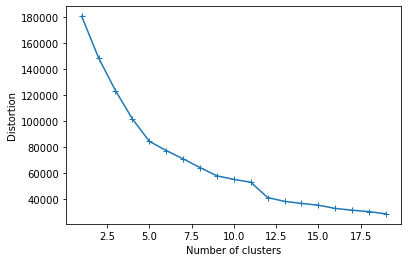

In [27]:
dist_list = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i,init='random',random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)
plt.plot(range(1,20),dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [28]:
bank_with_cluster = pd.concat([bank,labels],axis=1)
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1


In [33]:
bins = [15,20,25,30,35,40,45,50,55,60,65,100]
qcut_age = pd.cut(bank_with_cluster.age,bins,right=False)
df = pd.concat([bank_with_cluster.cluster_number,qcut_age],axis=1)
cross_cluster_age = df.groupby(['cluster_number','age']).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,0,0,0,0,0,1023,4490,3833,3475,850,735
1,45,705,3965,8221,6731,3941,0,0,0,0,0
2,1,20,230,788,956,718,598,328,170,29,4
3,0,20,129,327,306,186,145,117,71,38,34
4,0,11,74,240,219,203,156,140,155,48,36
5,1,6,66,164,137,114,81,70,51,9,1


In [34]:
df

,cluster_number,age
0,0,"[55, 60)"
1,0,"[40, 45)"
2,1,"[30, 35)"
3,0,"[45, 50)"
4,1,"[30, 35)"
...,...,...
45206,0,"[50, 55)"
45207,0,"[65, 100)"
45208,0,"[65, 100)"
45209,0,"[55, 60)"


In [35]:
hist_age = pd.value_counts(qcut_age)
hist_age

[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='cluster_number'>

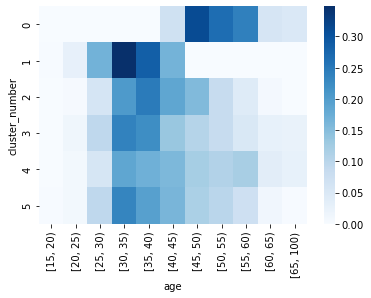

In [38]:
sns.heatmap(cross_cluster_age.apply(lambda x:x/x.sum(),axis=1),cmap='Blues')

In [42]:
cross_cluster_age.apply(lambda x:x/x.sum(),axis=1).sum(axis=1)

cluster_number
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
dtype: float64

In [43]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number','job']).size().unstack().fillna(0)
cross_cluster_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,1408,2906,528,651,2723,2005,476,1072,3,2048,432,154
1,3005,5385,698,409,4932,55,820,2474,812,4256,687,75
2,392,862,146,108,896,60,139,371,42,701,91,34
3,193,239,42,21,335,53,42,113,53,244,33,5
4,109,175,54,36,417,77,71,69,22,192,49,11
5,64,165,19,15,155,14,31,55,6,156,11,9


<AxesSubplot:xlabel='job', ylabel='cluster_number'>

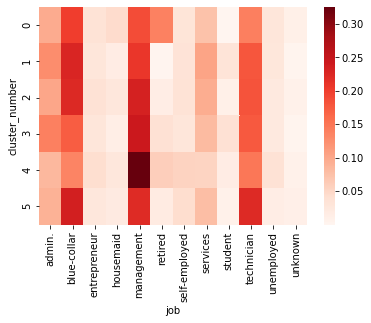

In [44]:
sns.heatmap(cross_cluster_job.apply(lambda x : x/x.sum(),axis=1),cmap='Reds')

## 主成分分析

相関係数: 0.889


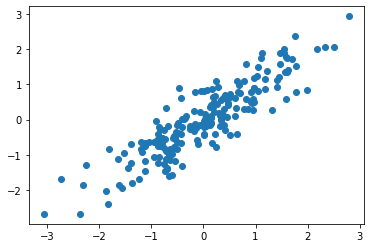

In [47]:
from sklearn.preprocessing import StandardScaler
sample = np.random.RandomState(1)
X = np.dot(sample.rand(2,2),sample.randn(2,200)).T
sc = StandardScaler()
X_std = sc.fit_transform(X)
print('相関係数: {:.3f}'.format(sp.stats.pearsonr(X_std[:,0],X_std[:,1])[0]))
plt.scatter(X_std[:,0],X_std[:,1])

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_std)

PCA(n_components=2)

In [50]:
print(pca.components_)

[[-0.707 -0.707]
 [-0.707  0.707]]


In [53]:
print('各主成分の分散:{}'.format(pca.explained_variance_))

各主成分の分散:[1.899 0.111]


In [51]:
print('各主成分の分散割合:{}'.format(pca.explained_variance_ratio_))

各主成分の分散割合:[0.945 0.055]


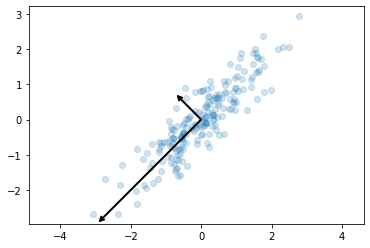

In [55]:
arrowprops=dict(arrowstyle='->',
               linewidth=2,
               shrinkA=0,shrinkB=0)
def draw_vector(v0,v1):
    plt.gca().annotate('',v1,v0,arrowprops=arrowprops)
plt.scatter(X_std[:,0],X_std[:,1],alpha=0.2)
for length, vector in zip(pca.explained_variance_,pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_+v)
plt.axis('equal');

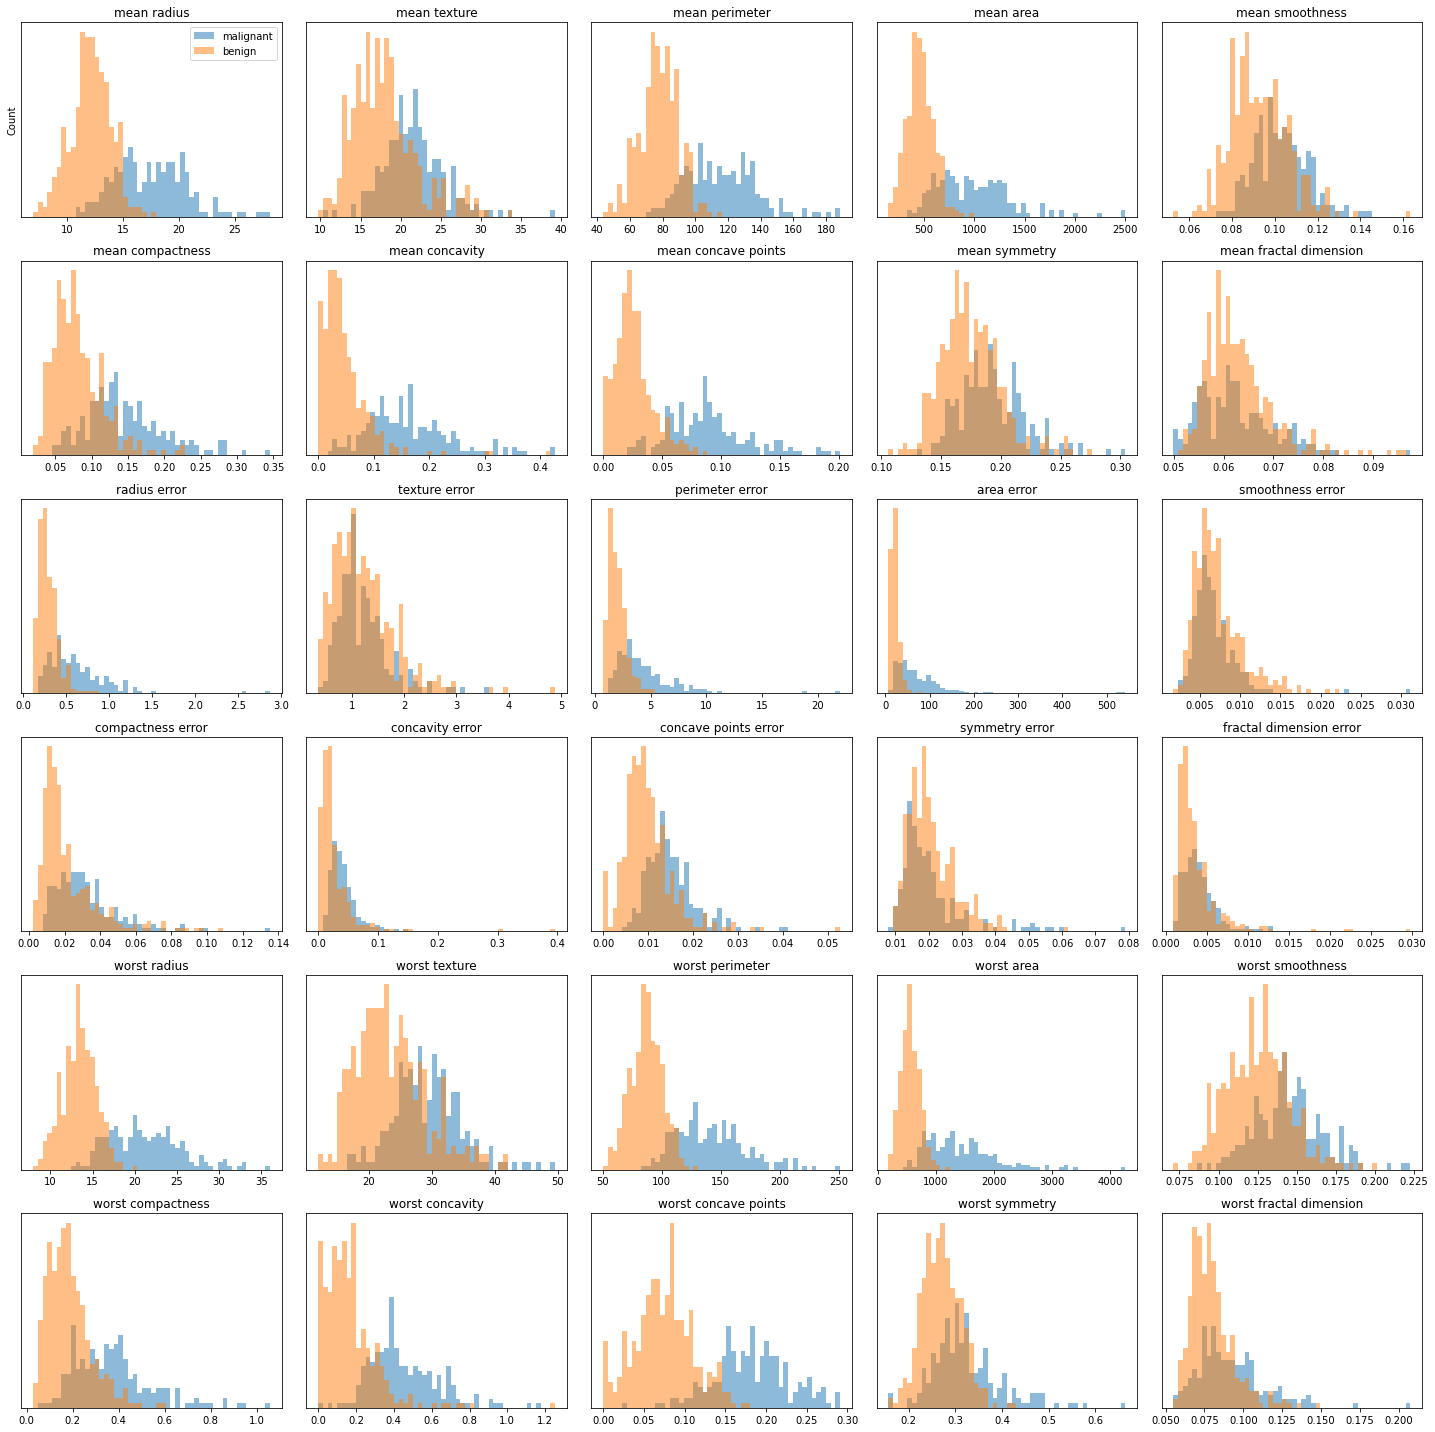

In [66]:
# 主成分分析の実例
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]
fig, axes = plt.subplots(6,5,figsize=(20,20))
ax = axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i], bins, alpha=.5)
    ax[i].hist(benign[:,i], bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_ylabel('Count')
ax[0].legend(['malignant','benign'],loc='best')
fig.tight_layout()

In [67]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)
pca = PCA(n_components = 2)
pca.fit(X_std)
X_pca = pca.transform(X_std)
print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ratio:{}'.format(pca.explained_variance_ratio_))

X_pca shape:(569, 2)
Explained variance ratio:[0.443 0.19 ]


In [68]:
X_pca = pd.DataFrame(X_pca,columns=['pc1','pc2'])
X_pca = pd.concat([X_pca,pd.DataFrame(cancer.target,columns=['target'])],axis=1)
pca_malignant = X_pca[X_pca['target']==0]
pca_benign = X_pca[X_pca['target']==1]

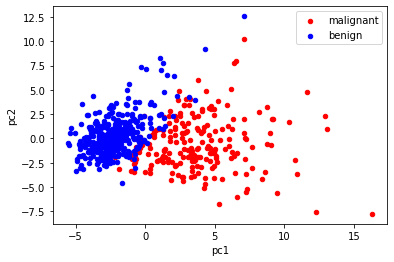

In [69]:
ax = pca_malignant.plot.scatter(x='pc1',y='pc2',color='red',label='malignant');
pca_benign.plot.scatter(x='pc1',y='pc2',color='blue',label='benign',ax=ax);

### マーケットバスケット分析

In [70]:
ls

README.md        chap1.ipynb  chap3.ipynb  chap6.ipynb  chap9/
Untitled.ipynb   chap2.ipynb  chap4.ipynb  chap7.ipynb  first_test.ipynb
Untitled1.ipynb  chap3/       chap5.ipynb  chap8.ipynb


In [75]:
trans = pd.read_excel('./chap9/Online Retail.xlsx',sheet_name='Online Retail')
trans.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [77]:
trans.shape

(541909, 8)

In [78]:
trans['cancel_flg'] = trans.InvoiceNo.map(lambda x:str(x)[0])
trans.groupby('cancel_flg').size()

cancel_flg
5    532618
A         3
C      9288
dtype: int64

In [79]:
trans = trans[(trans.cancel_flg == '5') & (trans.CustomerID.notnull())]

In [80]:
trans['StockCode'].value_counts().head(5)

85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
Name: StockCode, dtype: int64

In [82]:
trans_all = set(trans.InvoiceNo)
trans_a = set(trans[trans['StockCode']=='85123A'].InvoiceNo)
print(len(trans_a))
trans_b = set(trans[trans['StockCode']=='85099B'].InvoiceNo)
print(len(trans_b))
trans_ab = trans_a&trans_b
print(len(trans_ab))

1978
1600
252


In [83]:
print('両商品を含むバスケットの数：{}'.format(len(trans_ab)))
print('両商品を含むバスケットの全体に占める割合：{:.3f}'.format(len(trans_ab)/len(trans_all)))

両商品を含むバスケットの数：252
両商品を含むバスケットの全体に占める割合：0.014


In [84]:
print('商品Aを含むバスケットの数：{}'.format(len(trans_a)))
print('商品Aを含むバスケットの全体に占める割合：{:.3f}'.format(len(trans_a)/len(trans_all)))

商品Aを含むバスケットの数：1978
商品Aを含むバスケットの全体に占める割合：0.107


In [85]:
print('確信度：{:.3f}'.format(len(trans_ab)/len(trans_a)))

確信度：0.127


In [86]:
print('確信度：{:.3f}'.format(len(trans_ab)/len(trans_b)))

確信度：0.158


In [88]:
support_b = len(trans_b)/len(trans_all)
confidence = len(trans_ab)/len(trans_a)
lift = confidence/support_b
print('lift:{:.3f}'.format(lift))
## lift値：1以上なら併売しやすい

lift:1.476
